In [252]:
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt

class Dataset: #26
    #Dataset conformado de los valores de Batch Size y Machine Efficiency. 
    def __init__(self):
        self.x = [108, 115, 106, 97, 95, 91, 97, 83, 83, 78, 54, 67, 56, 53, 61, 115, 81, 78, 30, 45, 99, 32, 25, 28, 90, 89]
        self.y = [95, 96, 95, 97, 93, 94, 95, 93, 92, 86, 73, 80, 65, 69, 77, 96, 87, 89, 60, 63, 95, 61, 55, 56, 94, 93]
    def getX(self):
        return self.x
    def getY(self):
        return self.y


class PolynomialRegression:
    #Recepcion de la data y grado y generacion de array de betas
    def __init__(self, data, degree):
        self.data = data
        self.X = array(data.getX()).reshape(-1, 1)
        self.Y = array(data.getY()).reshape(-1, 1)
        self.degree = degree
        self.beta = []
    #Calculo de betas de acuerdo al grado en la Regresion Polinomial
    def calculateBetas(self):
        X_poly = ones_like(self.X)
        for i in range(1, self.degree + 1):
            X_poly = concatenate((X_poly, power(self.X, i)), axis=1)
        Q, R = linalg.qr(X_poly)
        self.beta = linalg.solve(R, dot(Q.T, self.Y))
    #Ecuacion de betas de Regresion Polinomial
    def equation(self,X):
        equation = "Y = "
        for i in range(self.degree + 1):
            if(i==0):
                equation += f"{self.beta[i]}"
            else:
                equation += f" + {self.beta[i]} {X}^{i}"
        return equation
    #Predicciones de la Regresion Polinomial
    def predict(self, x):
        y = 0
        for i in range(self.degree + 1):
            if (i == 0):
                y += (self.beta[i])
            else:
                y += (self.beta[i] * (x ** i))
        return y
    #Calculo de Coeficientes de Determinacion de la Regresion Polinomial
    def coefficientDetermination(self):
        RES = 0
        TOT = 0
        mediaY = mean(self.data.getY())
        for i in range(26):
            yHat = self.predict(self.data.x[i])
            RES += (self.data.y[i] - yHat) ** 2
            TOT += (self.data.y[i] - mediaY) ** 2
        return 1 - (RES / TOT)
    #Calculo de Coeficientes de Correlacion de la Regresion Polinomial
    def coefficientCorrelation(self):
        return sqrt(self.coefficientDetermination())
    def obtenerX(self):
        return self.X
    def obtenerY(self):
        return self.Y

In [253]:
batch = [108, 115, 106, 97, 95, 91, 97, 83, 83, 78, 54, 67, 56, 53, 61, 115, 81, 78, 30, 45, 99, 32, 25, 28, 90, 89]
machine = [95, 96, 95, 97, 93, 94, 95, 93, 92, 86, 73, 80, 65, 69, 77, 96, 87, 89, 60, 63, 95, 61, 55, 56, 94, 93]
df = pd.DataFrame({"Batch Size": batch, "Machine Efficiency": machine})
df

,Batch Size,Machine Efficiency
0,108,95
1,115,96
2,106,95
3,97,97
4,95,93
5,91,94
6,97,95
7,83,93
8,83,92
9,78,86


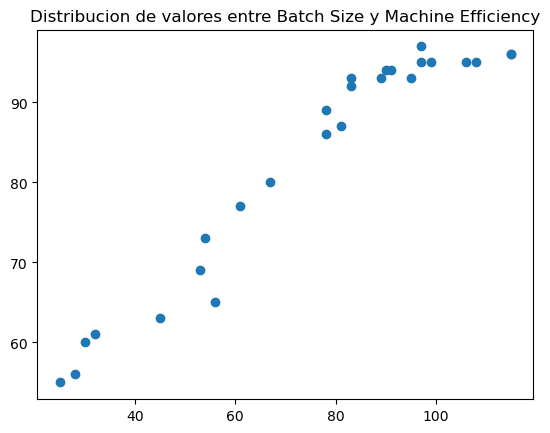

In [254]:
fig= plt.figure()
axes=fig.add_subplot(111)
axes.scatter(batch,machine)
axes.set_title(f'Distribucion de valores entre Batch Size y Machine Efficiency')
plt.show()

In [255]:
data = Dataset()
linear = PolynomialRegression(data, degree=1)
quadratic = PolynomialRegression(data, degree=2)
cubic = PolynomialRegression(data, degree=3)

    
cubic.calculateBetas()
quadratic.calculateBetas()
linear.calculateBetas()
    
print("Ecuación de Regresión Polinomial lineal:",linear.equation("X"))
print("Ecuación de Regresión Polinomial cuadratica:",quadratic.equation("X"))
print("Ecuación de Regresión Polinomial cubica:",cubic.equation("X"))

print("\n--Predicciones--")
print("Prediccion lineal X=60 :", linear.equation(60))
print("Y = ", linear.predict(60))
print("Prediccion cuadratica X=60 :", quadratic.equation(60))
print("Y = ", quadratic.predict(60))
print("Prediccion cubica X=60 :", cubic.equation(60))
print("Y = ", cubic.predict(60))

print("\nPrediccion lineal X=102 :", linear.equation(102))
print("Y = ", linear.predict(102))
print("Prediccion cuadratica X=102 :", quadratic.equation(102))
print("Y = ", quadratic.predict(102))
print("Prediccion cubica X=102 :", cubic.equation(102))
print("Y = ", cubic.predict(102))

print("\nPrediccion lineal X=117 :", linear.equation(117))
print("Y = ", linear.predict(117))
print("Prediccion cuadratica X=117 :", quadratic.equation(117))
print("Y = ", quadratic.predict(117))
print("Prediccion cubica X=117 :", cubic.equation(117))
print("Y = ", cubic.predict(117))

print("\nCoeficiente de determinacion lineal:",linear.coefficientDetermination())
print("Coeficiente de correlacion lineal:",linear.coefficientCorrelation())

print("\nCoeficiente de determinacion cuadratica:", cubic.coefficientDetermination())
print("Coeficiente de correlacion cuadratica:", cubic.coefficientCorrelation())

print("\nCoeficiente de determinacion cubica:", quadratic.coefficientDetermination())
print("Coeficiente de correlacion cubica:", quadratic.coefficientCorrelation())


Ecuación de Regresión Polinomial lineal: Y = [44.12464523] + [0.51214684] X^1
Ecuación de Regresión Polinomial cuadratica: Y = [30.62498854] + [0.97464948] X^1 + [-0.00333067] X^2
Ecuación de Regresión Polinomial cubica: Y = [65.07404699] + [-0.89229938] X^1 + [0.02564966] X^2 + [-0.00013602] X^3

--Predicciones--
Prediccion lineal X=60 : Y = [44.12464523] + [0.51214684] 60^1
Y =  [74.85345578]
Prediccion cuadratica X=60 : Y = [30.62498854] + [0.97464948] 60^1 + [-0.00333067] 60^2
Y =  [77.11354211]
Prediccion cubica X=60 : Y = [65.07404699] + [-0.89229938] 60^1 + [0.02564966] 60^2 + [-0.00013602] 60^3
Y =  [74.49518859]

Prediccion lineal X=102 : Y = [44.12464523] + [0.51214684] 102^1
Y =  [96.36362317]
Prediccion cuadratica X=102 : Y = [30.62498854] + [0.97464948] 102^1 + [-0.00333067] 102^2
Y =  [95.38693545]
Prediccion cubica X=102 : Y = [65.07404699] + [-0.89229938] 102^1 + [0.02564966] 102^2 + [-0.00013602] 102^3
Y =  [96.57627201]

Prediccion lineal X=117 : Y = [44.12464523] + [


Predicciones Ordenadas

[56.92831629]
[58.46475682]
[59.48905051]
[60.51334419]
[67.17125314]
[71.26842788]
[71.78057473]
[72.80486841]
[75.36560263]
[78.43848368]
[84.07209895]
[84.07209895]
[85.60853948]
[86.63283316]
[86.63283316]
[89.70571422]
[90.21786106]
[90.7300079]
[92.77859527]
[93.80288896]
[93.80288896]
[94.82718264]
[98.41221054]
[99.43650422]
[103.02153212]
[103.02153212]



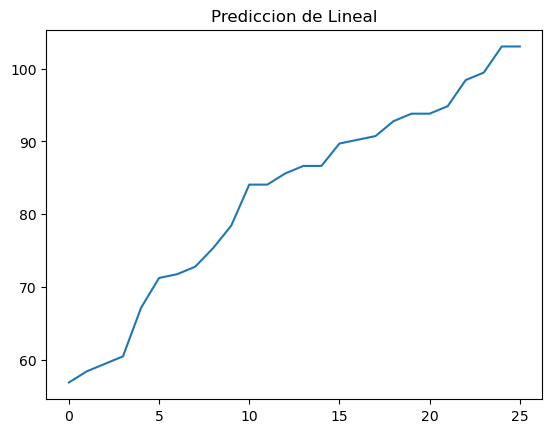

In [262]:
listax=linear.obtenerX()
listay=linear.obtenerY()
lista=[]
fig= plt.figure()
axes=fig.add_subplot(111)
#Este espacio es solo un testeo de observacion
"""
print("Valores en x")
for i in range(26):
    print(listax[i])
print()

print("Predicciones en x")
for i in range(26):
    print(linear.predict(listax[i]))
print()
"""

#Asignacion de predicciones de x a lista
for i in range(26):
    valor=linear.predict(listax[i])
    lista.append(valor)
print()

print("Predicciones Ordenadas")
print()
lista.sort()
#Este espacio es solo un testeo de observacion

for i in range(26):
    print(lista[i])
print()


axes.plot(lista)
axes.set_title(f'Prediccion de Lineal')
plt.show()


Predicciones Ordenadas

[52.90955624]
[55.303928]
[56.86686914]
[58.40316491]
[67.73960658]
[72.92555643]
[73.54382413]
[74.76037549]
[77.68518041]
[80.97512204]
[86.38384623]
[86.38384623]
[87.71906465]
[88.57590356]
[88.57590356]
[90.98654806]
[91.36500745]
[91.7368055]
[93.15738427]
[93.8277056]
[93.8277056]
[94.47138157]
[96.51441518]
[97.038187]
[98.66155608]
[98.66155608]



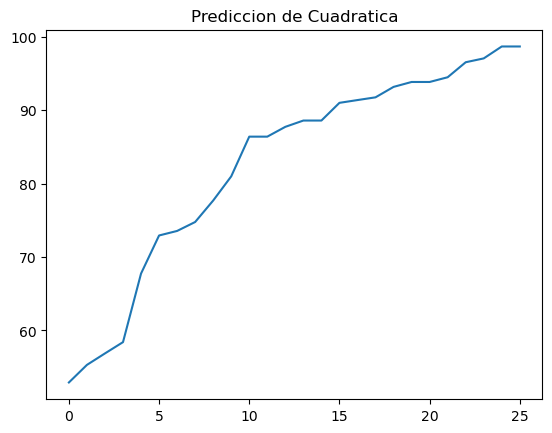

In [263]:
listax=quadratic.obtenerX()
listay=quadratic.obtenerY()
lista=[]
fig= plt.figure()
axes=fig.add_subplot(111)
#Este espacio es solo un testeo de observacion
"""
print("Valores en x")
for i in range(26):
    print(listax[i])
print()

print("Predicciones en x")
for i in range(26):
    print(linear.predict(listax[i]))
print()
"""

#Asignacion de predicciones de x a lista
for i in range(26):
    valor=quadratic.predict(listax[i])
    lista.append(valor)
print()

print("Predicciones Ordenadas")
print()
lista.sort()
#Este espacio es solo un testeo de observacion

for i in range(26):
    print(lista[i])
print()


axes.plot(lista)
axes.set_title(f'Prediccion de Cuadratica')
plt.show()


Predicciones Ordenadas

[56.6723331]
[57.21315117]
[57.71729905]
[58.32871199]
[64.46658565]
[69.582271]
[70.26650741]
[71.65585359]
[75.21289564]
[79.52243371]
[86.98009474]
[86.98009474]
[88.80021507]
[89.9409642]
[89.9409642]
[92.94260538]
[93.37297144]
[93.78118767]
[94.81156252]
[94.81156252]
[95.17623219]
[95.71963681]
[95.71963681]
[96.15159124]
[96.54113636]
[96.69150181]



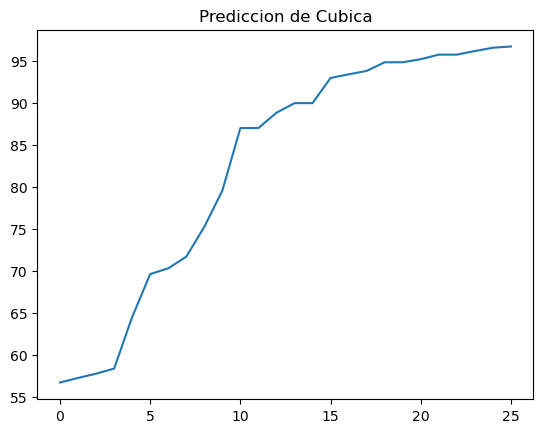

In [264]:
listax=cubic.obtenerX()
listay=cubic.obtenerY()
lista=[]
fig= plt.figure()
axes=fig.add_subplot(111)
#Este espacio es solo un testeo de observacion
"""
print("Valores en x")
for i in range(26):
    print(listax[i])
print()

print("Predicciones en x")
for i in range(26):
    print(linear.predict(listax[i]))
print()
"""

#Asignacion de predicciones de x a lista
for i in range(26):
    valor=cubic.predict(listax[i])
    lista.append(valor)
print()

print("Predicciones Ordenadas")
print()
lista.sort()
#Este espacio es solo un testeo de observacion

for i in range(26):
    print(lista[i])
print()


axes.plot(lista)
axes.set_title(f'Prediccion de Cubica')
plt.show()